<a href="https://colab.research.google.com/github/BilgehanUnal/BilgehanUnal/blob/main/bilgehan_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split


# Load Data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/final_data.csv')  # Replace with the correct path if needed



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


height


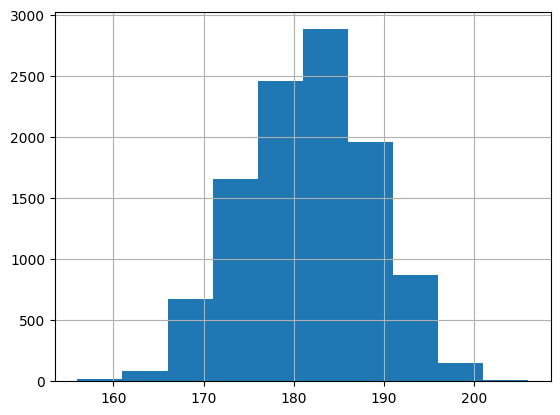

age


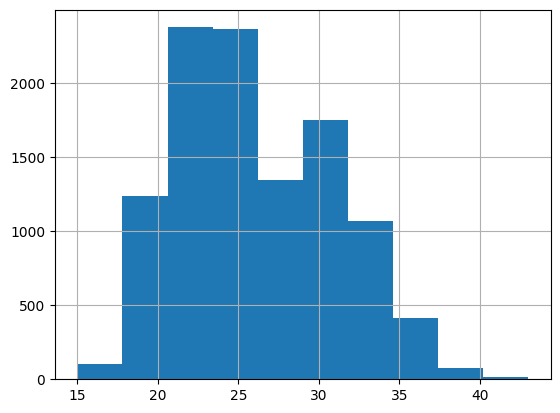

appearance


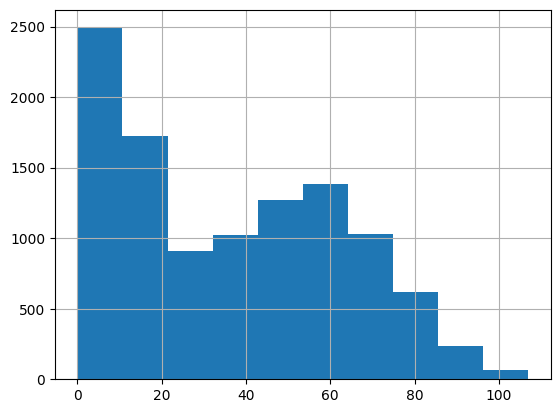

goals


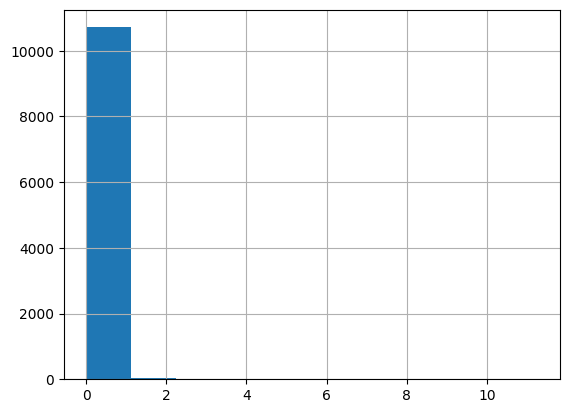

assists


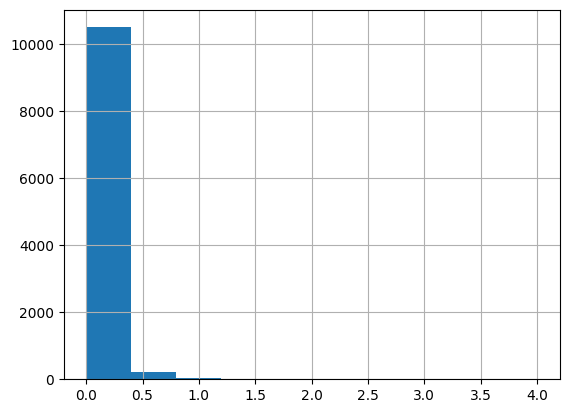

yellow cards


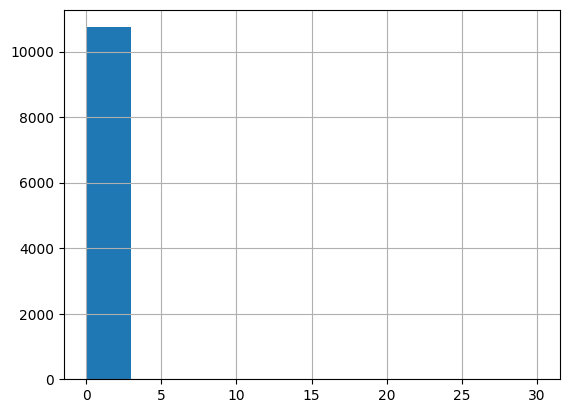

second yellow cards


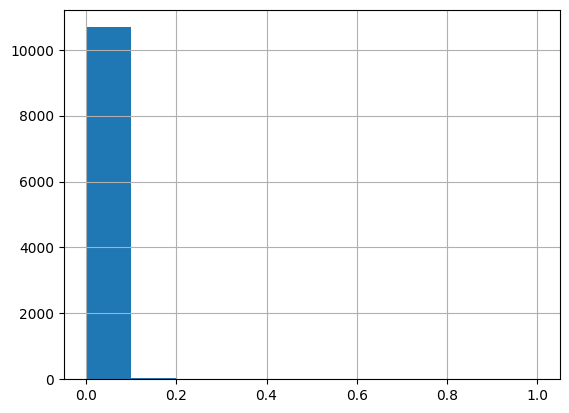

red cards


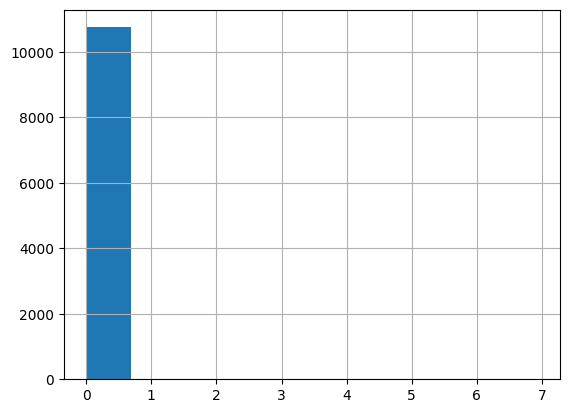

goals conceded


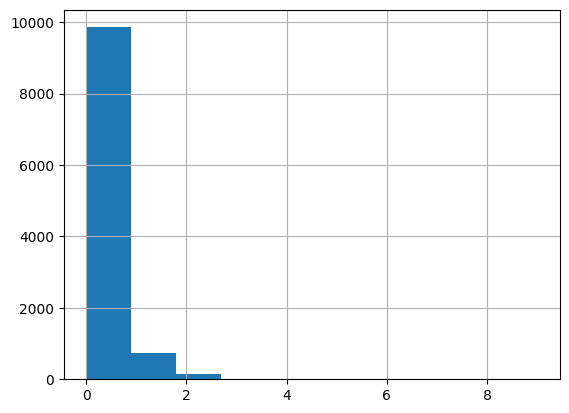

clean sheets


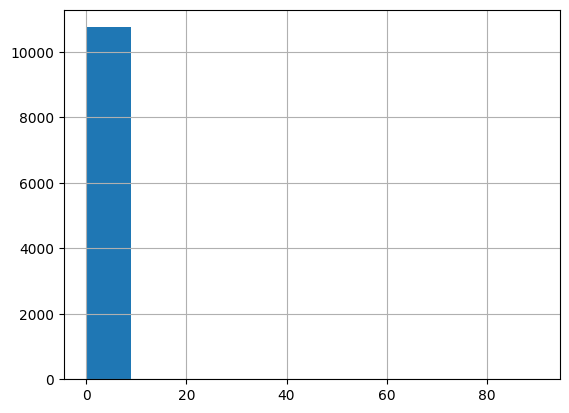

minutes played


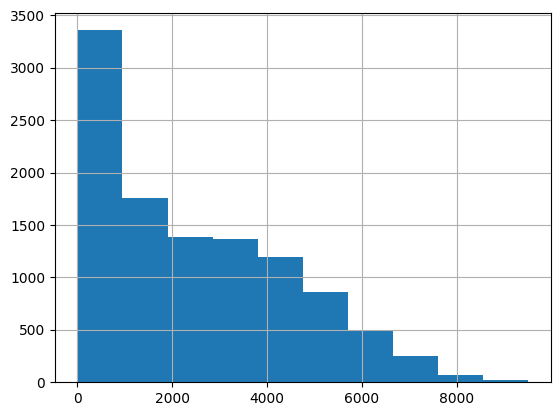

days_injured


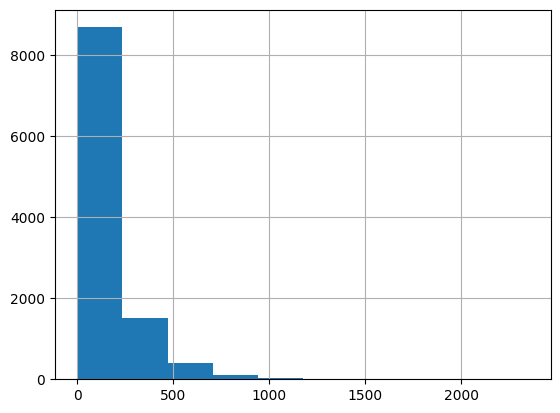

games_injured


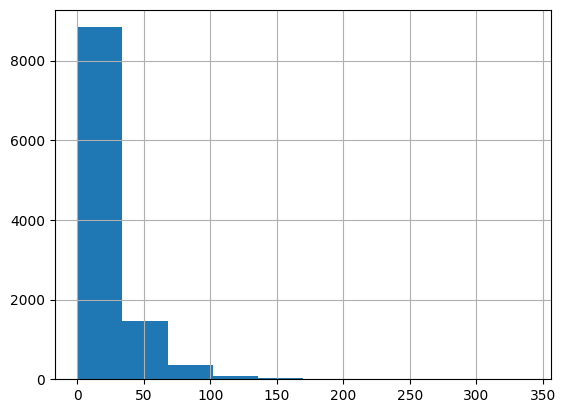

award


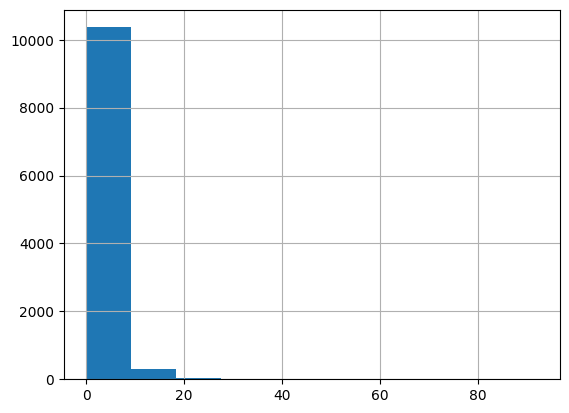

current_value


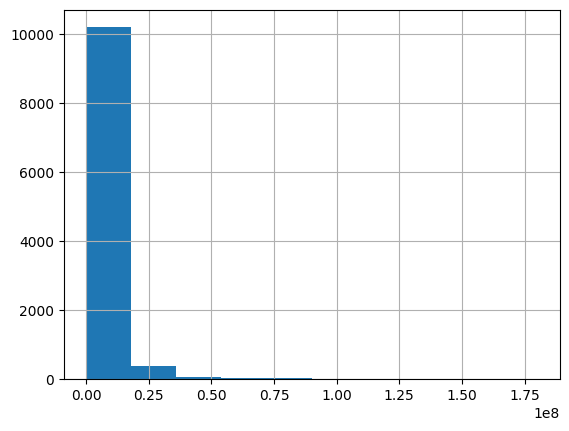

highest_value


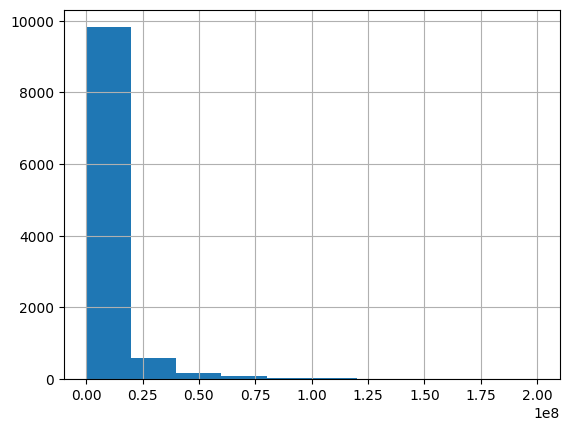

position_encoded


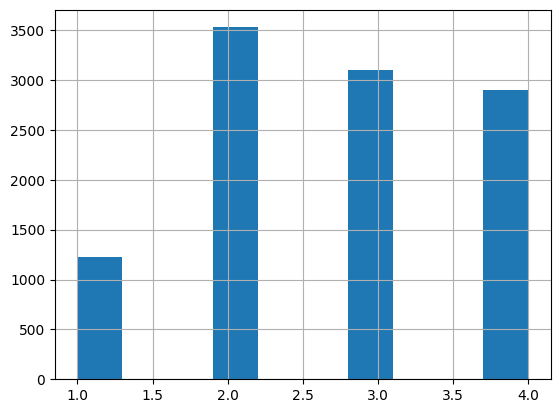

winger


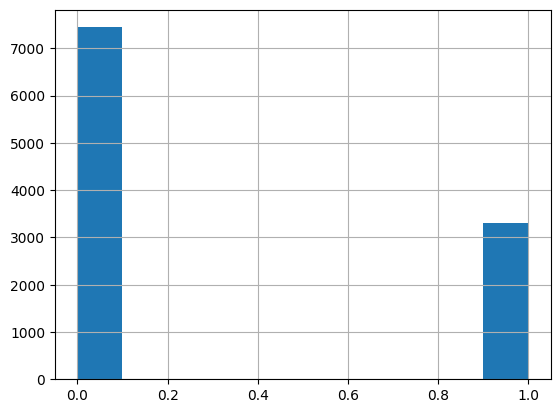

In [ ]:

#finding boundries of data for each atrribute
all_list=[]
range_list=[]
for j in attributes:
  for i in df[j]:
    all_list.append(i)
  range_list.append([min(all_list),max(all_list)])
  all_list=[]

# Creating histogram respect to their attributes
attributes = df.select_dtypes(include=['int64', 'float64']).columns

#finding boundries of data for each atrribute
all_list=[]
range_list=[]
for j in attributes:
  for i in df[j]:
    all_list.append(i)
  range_list.append([min(all_list),max(all_list)])
  all_list=[]

for i in range(len(attributes)):
  df[attributes[i]].hist(range=(range_list[i][0],range_list[i][1]))
  print(attributes[i])
  plt.show()

In [ ]:
#all info except current value
attributes_for_x= ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'highest_value', 'position_encoded', 'winger']

x = df[attributes_for_x].values
y = df['current_value'].values

# Fit the model
model = LinearRegression()
model.fit(x, y)

# Predicting on the same data
y_pred = model.predict(x)

# Calculating mean squared error
MSE = np.mean((y - y_pred) ** 2)
print(f'\nMean Squared Error: {MSE}')
# Print model coefficients and intercept
print("\nModel intercept:")
print(model.intercept_)
print("\nModel coefficients:")
print(model.coef_)


Mean Squared Error: 20520701586738.81

Model intercept:
5247419.389268799

Model coefficients:
[ 9.89314087e+02 -2.17861486e+05 -5.13428517e+04  7.88280676e+05
  1.14351893e+06  7.25782768e+04 -6.68146303e+04 -1.80851641e+05
 -2.86983947e+05  3.15391607e+04  1.16513387e+03  4.20483178e+03
 -4.93139021e+04 -3.33018992e+05  6.05783517e-01 -3.17578086e+04
 -5.73633282e+04]


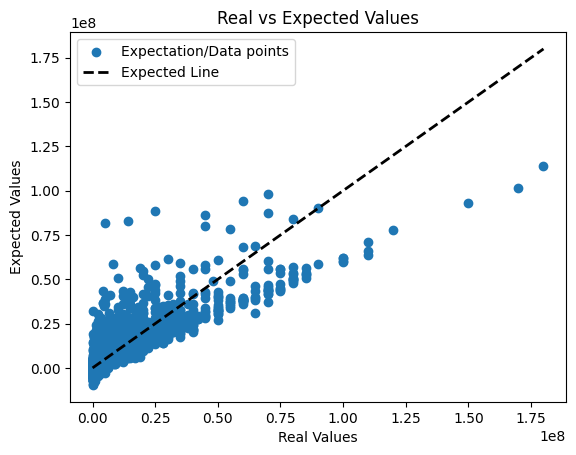

In [ ]:
# Scatter plot of predicted vs actual values with regression line
plt.figure(figsize=(12, 6))  # Single scatter plot size
plt.scatter(y, y_pred, label='Expectation/Data points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Expected Line')
plt.xlabel('Real Values')
plt.ylabel('Expected Values')
plt.title('Real vs Expected Values')
plt.legend()
plt.show()

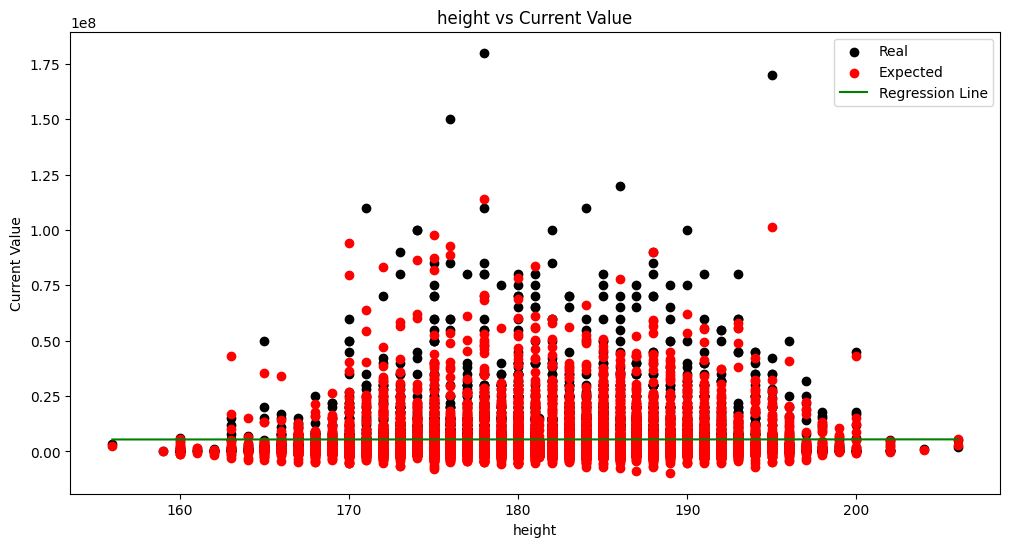

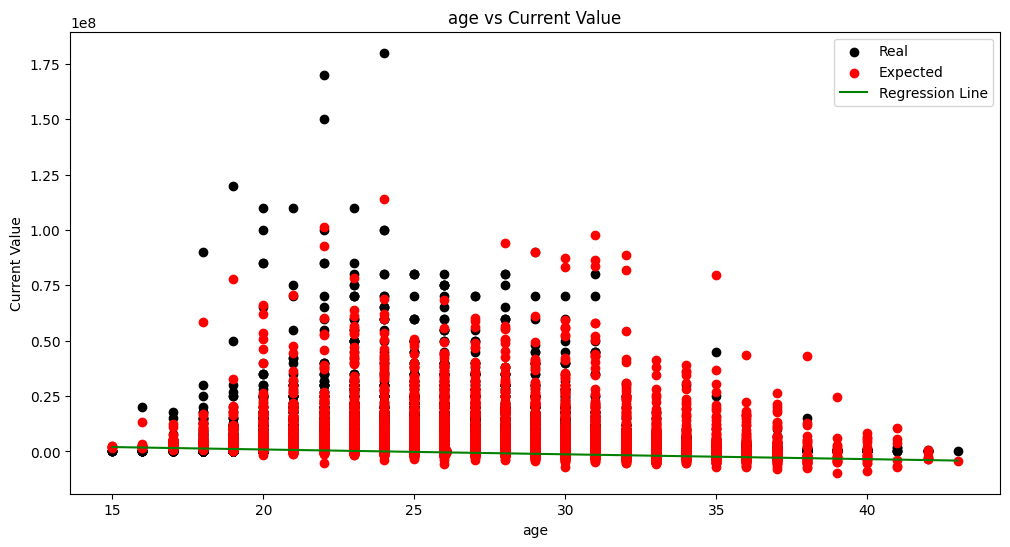

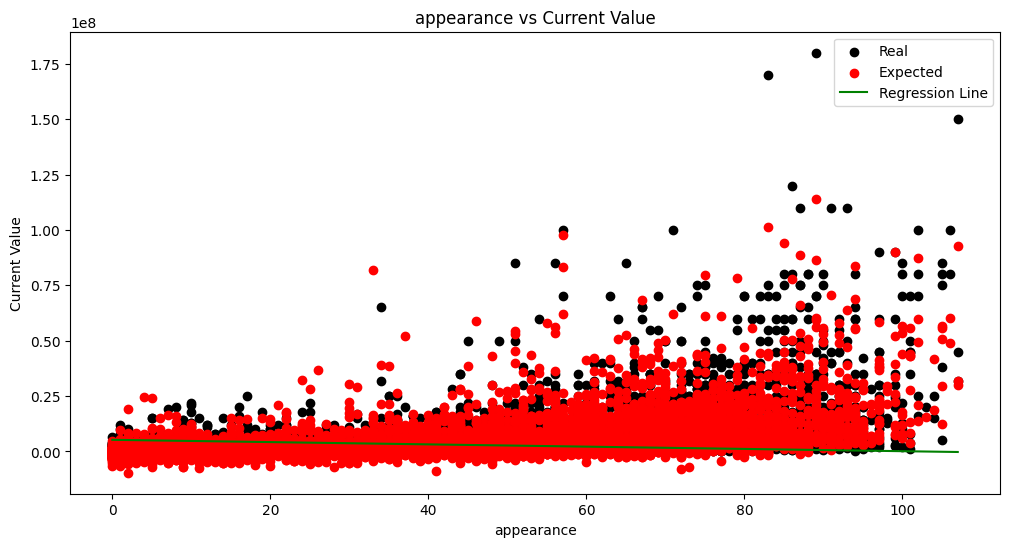

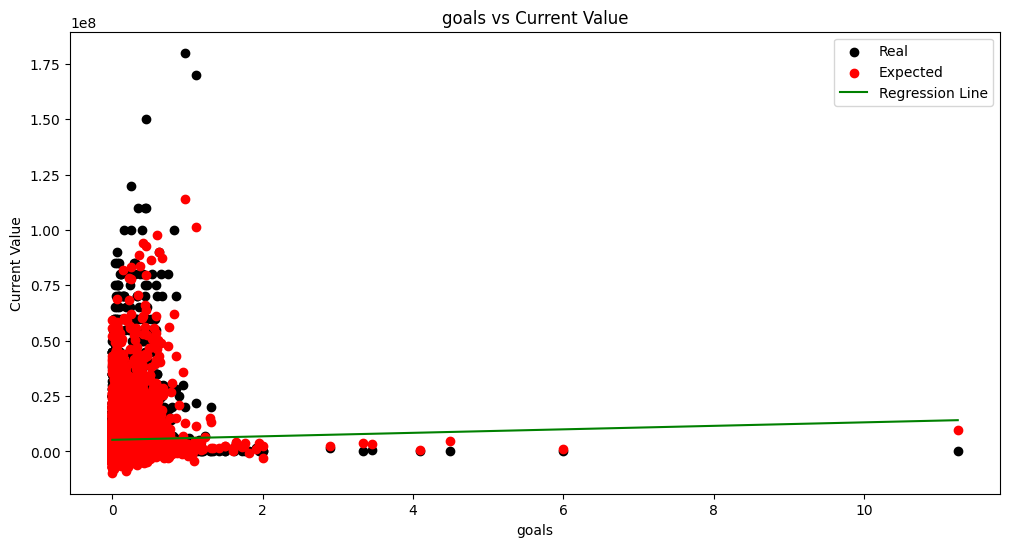

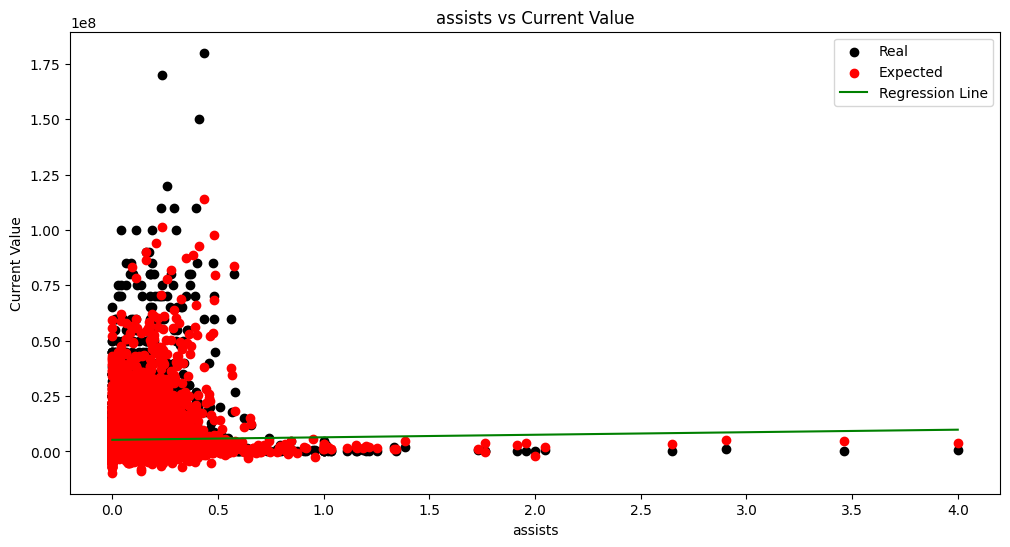

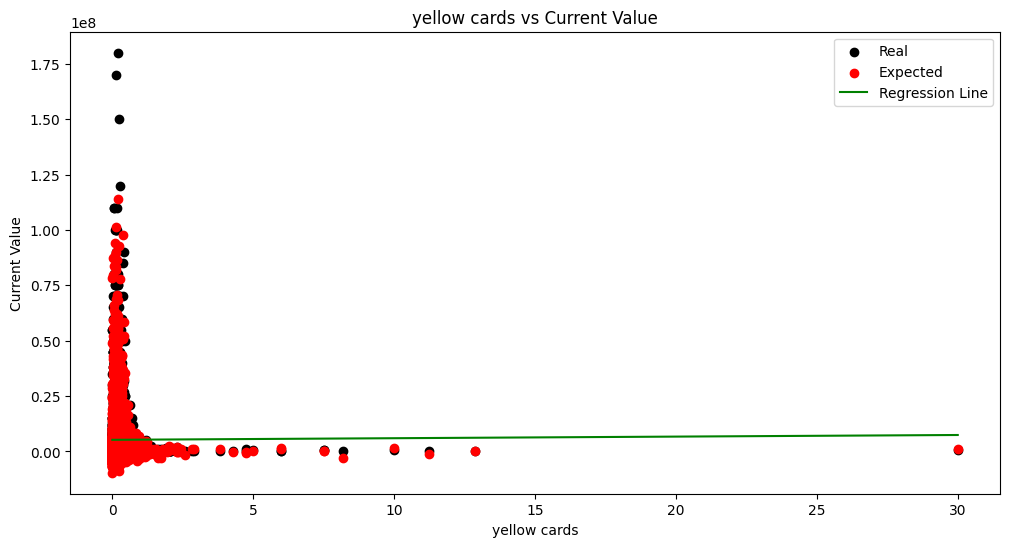

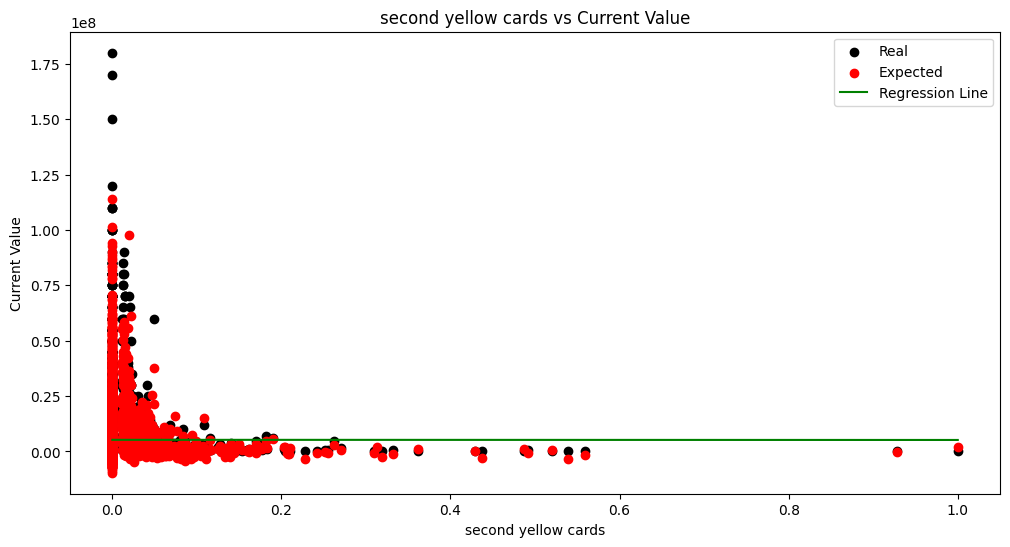

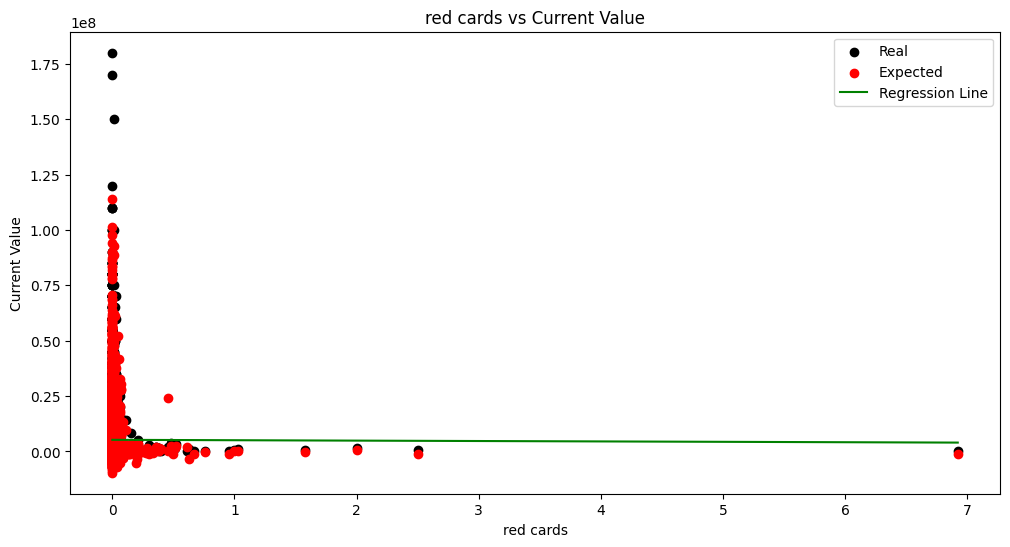

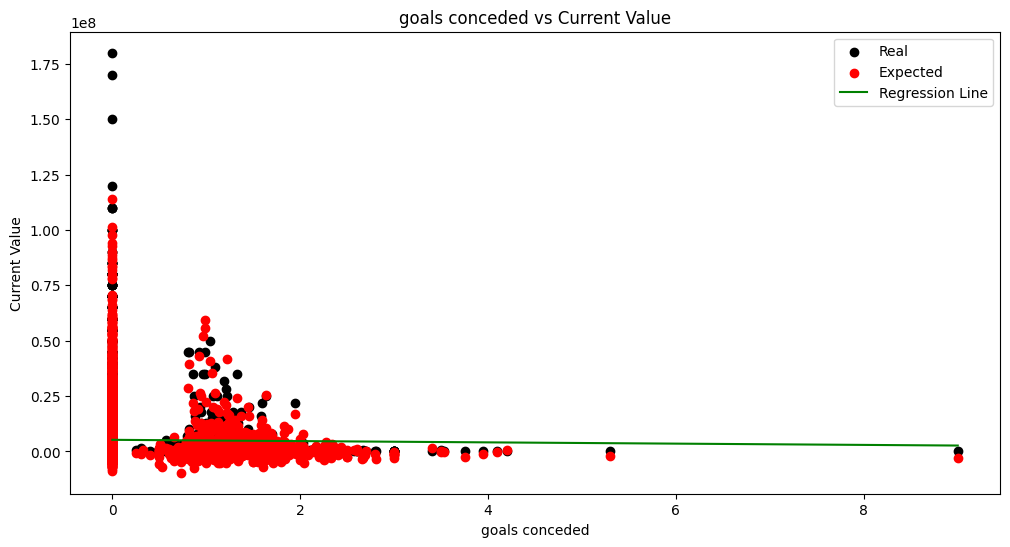

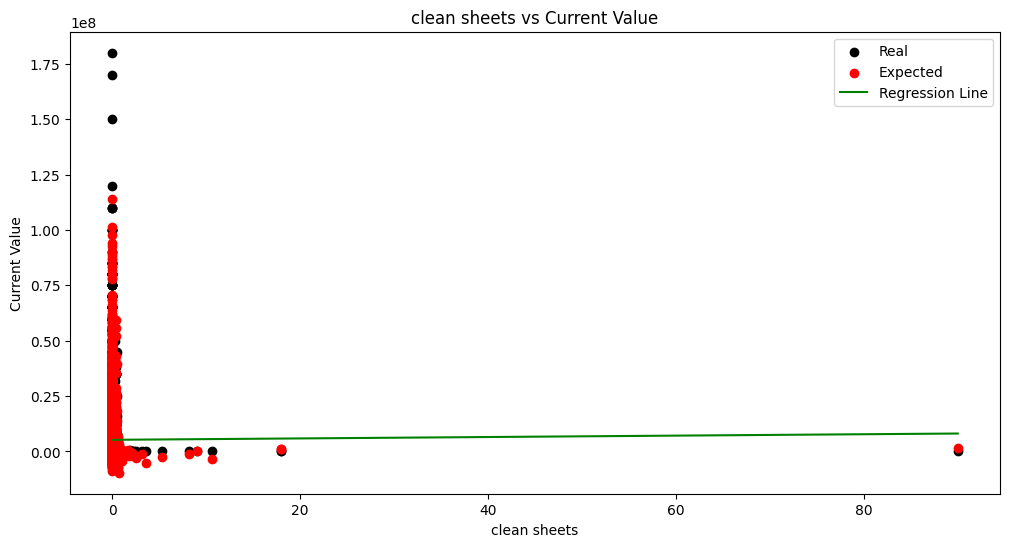

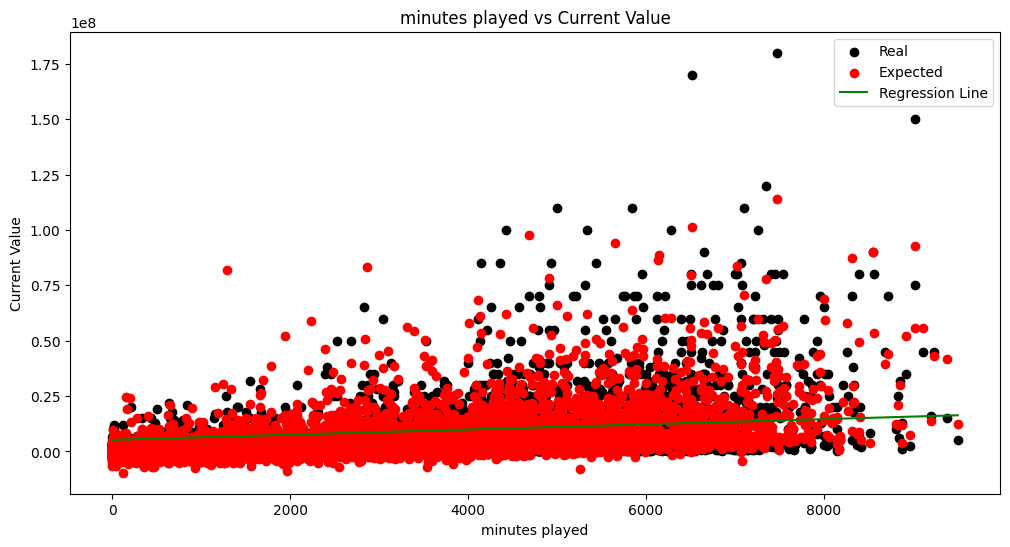

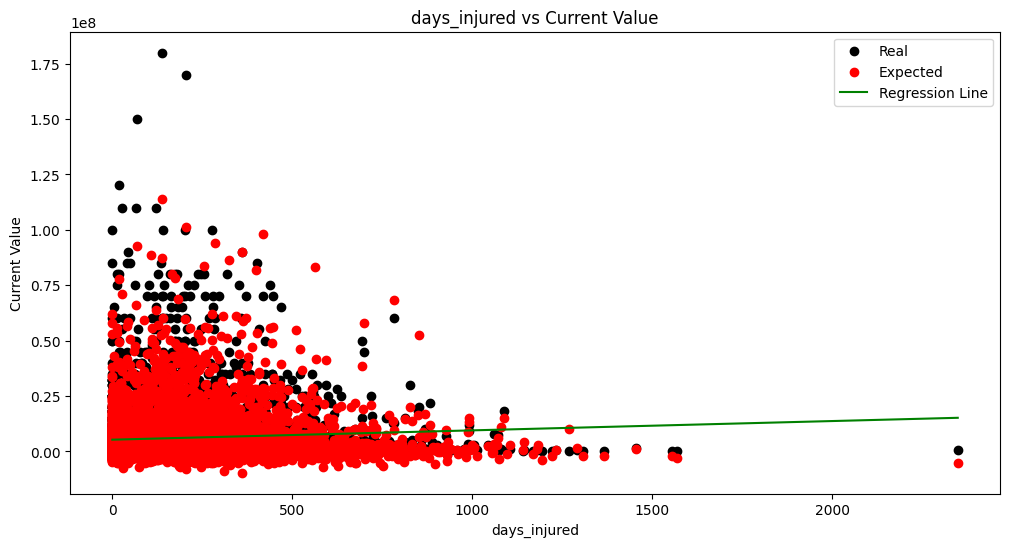

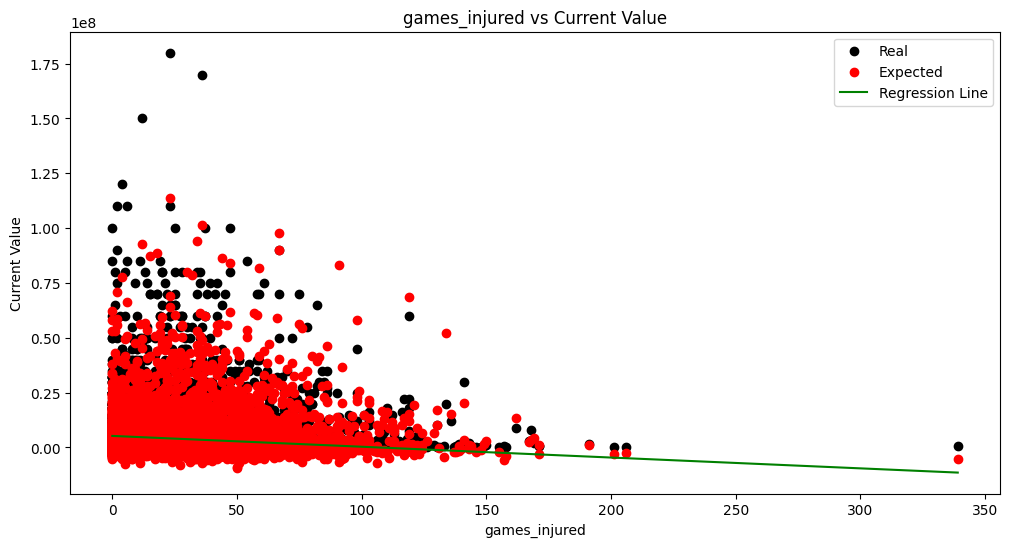

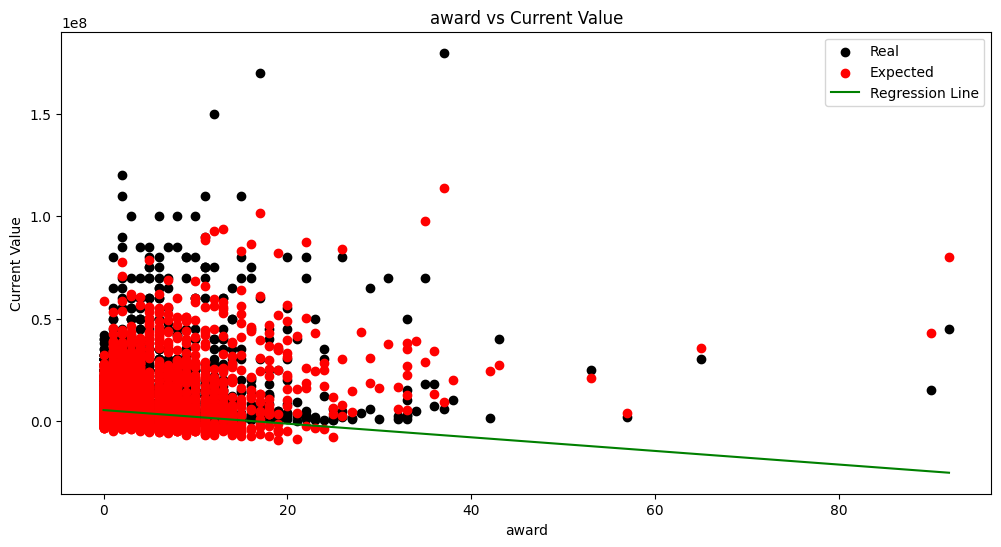

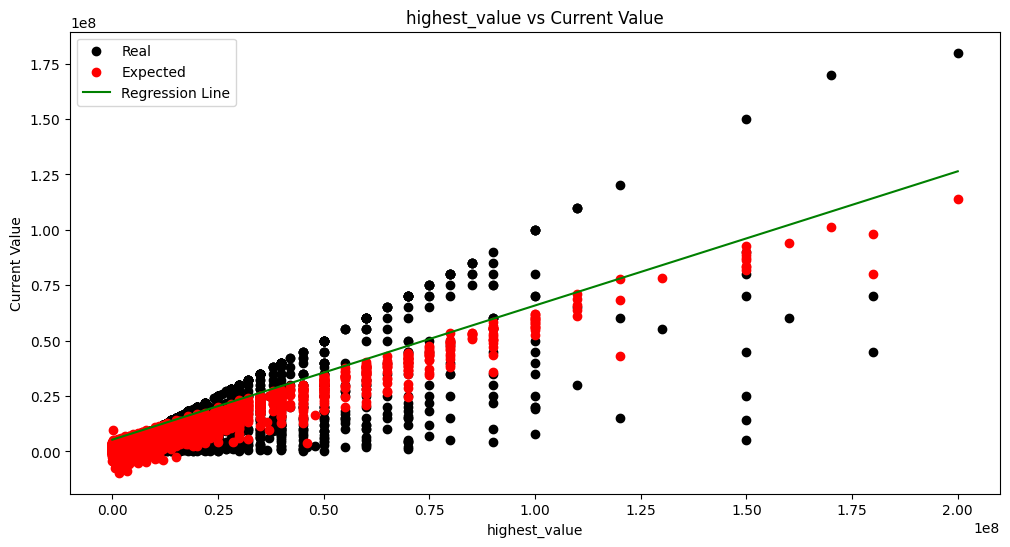

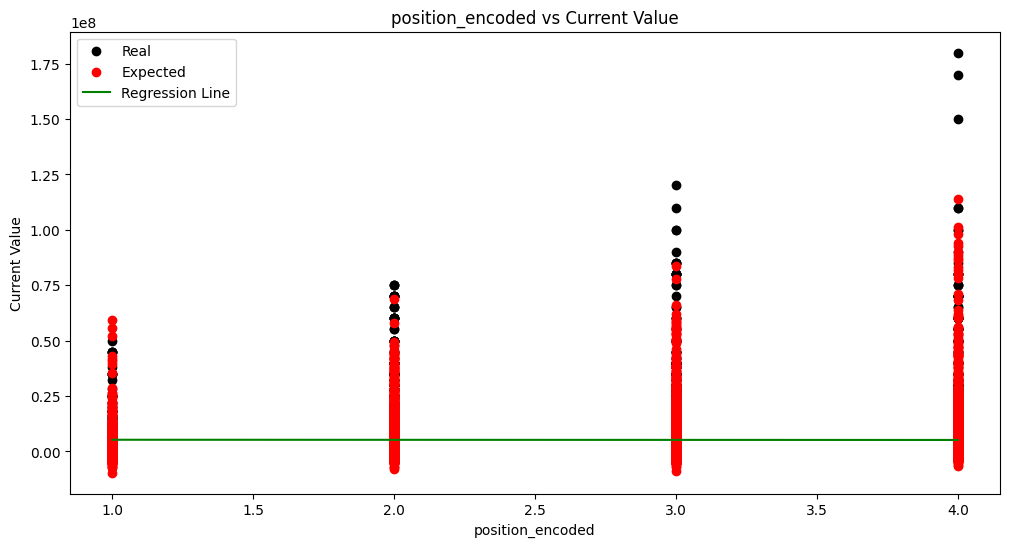

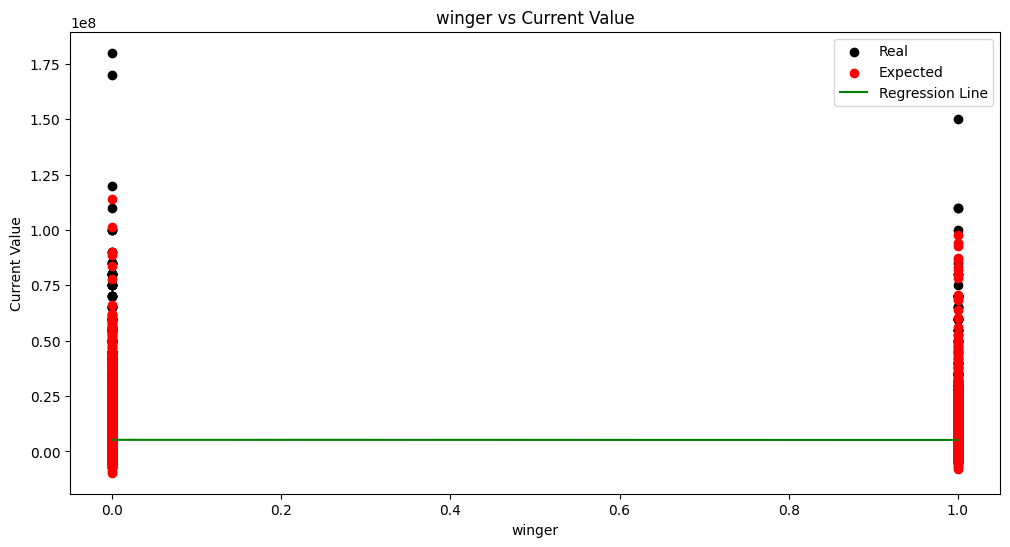

In [ ]:
# Linear regression plot for each feature
for i, feature in enumerate(attributes_for_x):
    plt.figure(figsize=(12, 6))  # Single regression plot size
    plt.scatter(x[:, i], y, color='black', label='Real')
    plt.scatter(x[:, i], y_pred, color='red', label='Expected')

    # Regression line
    x_range = np.linspace(x[:, i].min(), x[:, i].max())
    y_range = model.intercept_ + model.coef_[i] * x_range
    plt.plot(x_range, y_range, color='green', label='Regression Line')

    plt.xlabel(feature)
    plt.ylabel('Current Value')
    plt.title(f'{feature} vs Current Value')
    plt.legend()
    plt.show()